<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Elizabeth! My name is Svetlana (my handle on Discord is `svetatripleten`). Congratulations on submitting Computer Vision project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    
  
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully displayed and analyzed age distribution, great!
    
    
- It's also a good idea to display several photos, since we need to understand what kind of data we have;


- You have successfully defined train and test functions; 
    
    
- You have correctly built a model; 


- Analyzed the result in the final conclusion, which is also important! The analysis usually helps us to identify the area for further improvement.

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. However, there are no such issues, well done!

</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you very much for submitting the project! You have successfully built a model and recieved significant results, great job! Your project is great and does not have any issues that need to be fixed. Therefore, I accept the project now.
    
     



I hope you enjoyed this topic. Good luck! 
<hr>
    
    
✍️ Here's a nice playlist [Introduction to
Deep Learning](https://www.youtube.com/playlist?list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI) on youtube that you may find helpful and interesting. This is another interesting [Computer Vision Playlist](https://www.youtube.com/playlist?list=PLf7L7Kg8_FNxHATtLwDceyh72QQL9pvpQ).     
 
    
    
Here's a link to [AI for beginners](https://github.com/microsoft/ai-for-beginners) course by Microsoft. 
    
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

## Age Verification Models

The supermarket chain Good Seed would like to explore whether Data Science can help them adhere to alcohol laws by making sure they do not sell alcohol to people underage. You are asked to conduct that evaluation, so as you set to work, keep the following in mind:

The shops are equipped with cameras in the checkout area which are triggered when a person is buying alcohol
Computer vision methods can be used to determine age of a person from a photo
The task then is to build and evaluate a model for verifying people's age

#Data description

The dataset was obtained from ChaLearn Looking at People. It was prepared for the project and placed in the /datasets/faces/ folder, there you can find

The final_files folder with 7.6k photos
The labels.csv file with labels, with two columns: file_name and real_age

## Initialization

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [2]:
datagen = ImageDataGenerator(rescale=1./255)

df_labels = pd.read_csv('/datasets/faces/labels.csv')

datagen_flow = datagen.flow_from_dataframe(
    dataframe=df_labels,
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',  # Use 'raw' for regression tasks
    seed=12345)

Found 7591 validated image filenames.


## EDA

In [3]:
df_labels.info()

display(df_labels.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
5,000005.jpg,27
6,000006.jpg,24
7,000007.jpg,43
8,000008.jpg,26
9,000009.jpg,39


In [4]:
df_labels.isna().sum()

file_name    0
real_age     0
dtype: int64

In [5]:
df_labels.duplicated().sum()

0

Our dataset is has 7591 values and 2 columns. Our images and the real age of the image of the subject.  There are no missing values or duplicates in the data set. The real_age column will be our target when we get to the model.  Next we will dig deeper into what the ages are of the sample. 

In [6]:
df_labels['real_age'].describe()

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

(array([ 585.,  434., 1035., 1516., 1145.,  967.,  633.,  487.,  343.,
         153.,  134.,   78.,   34.,   36.,   11.]),
 array([  1. ,   7.6,  14.2,  20.8,  27.4,  34. ,  40.6,  47.2,  53.8,
         60.4,  67. ,  73.6,  80.2,  86.8,  93.4, 100. ]),
 <BarContainer object of 15 artists>)

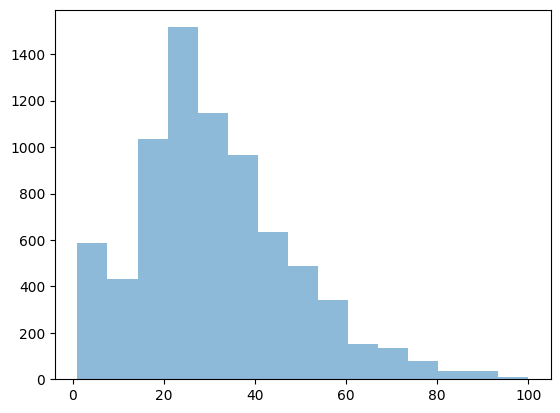

In [7]:
plt.hist(df_labels['real_age'], bins=15, alpha=0.5, label='Age Distribution')

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b> Reviewer's comment  </b>
    

Good job! Don't forget to add titles and axis labels so that the reader could easily understand what's going on in this graph. It is also a good habit to leave some comments under each graph. We do our job for the client and he or she may not understand the graph at all. That's why we need titels, labels and comments :)

    
You can use the following piece of code:    
</div>

```python

plt.title('Title')
plt.xlabel('X')
plt.ylabel('Y')

```

Based on our data description and our histogram we can see that our data is slightly skewed to the left, with a majority of our sample falling between the ages of 20 and 40, but we do have samples across the whole life span from 0 to 100.  As there are less samples at more advanced ages it may have an impact on our model's accuracy at predicting ages over 60, but we will see when we get to our testing. Next we will print the images from our first 10 rows of the dataset to get a good overall impression of what the images look like across different ages. 

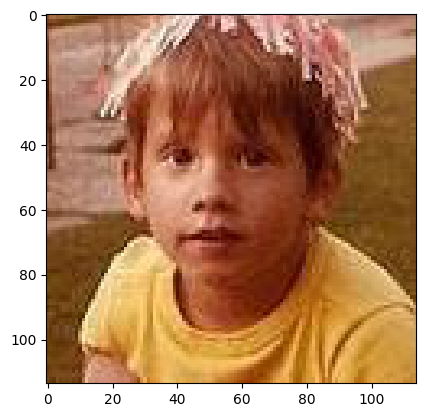

In [8]:
image = Image.open('/datasets/faces/final_files/000000.jpg')
plt.imshow(np.array(image))

#subject is 4 years old

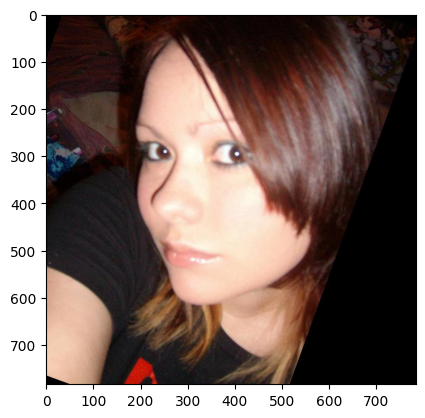

In [9]:
image = Image.open('/datasets/faces/final_files/000001.jpg')
plt.imshow(np.array(image))

#subject is 18 years old

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

`subplots` will make it look better. 

</div>

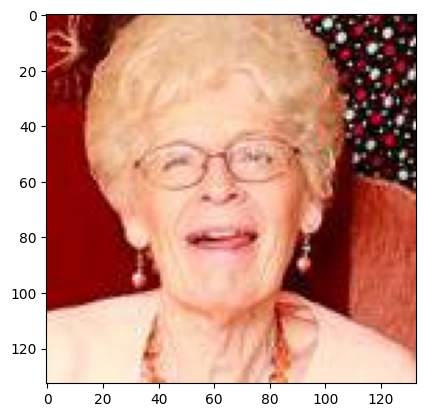

In [10]:
image = Image.open('/datasets/faces/final_files/000002.jpg')
plt.imshow(np.array(image))

#subject is 80 years old

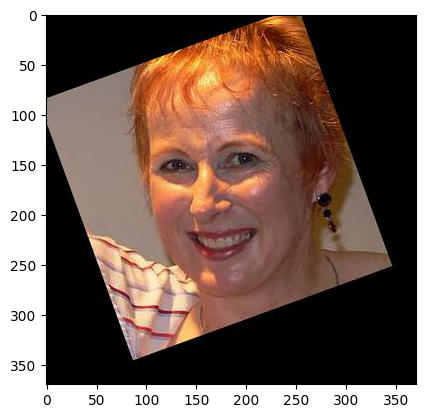

In [11]:
image = Image.open('/datasets/faces/final_files/000003.jpg')
plt.imshow(np.array(image))

#subject is 50 years old

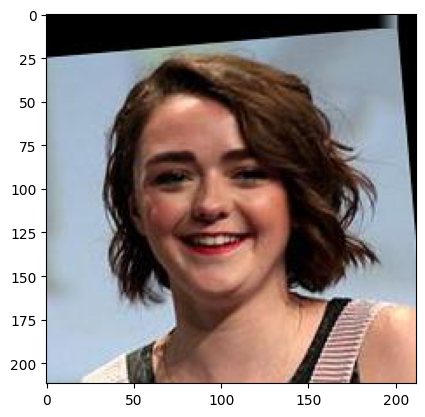

In [12]:
image = Image.open('/datasets/faces/final_files/000004.jpg')
plt.imshow(np.array(image))

#subject is 17 years old

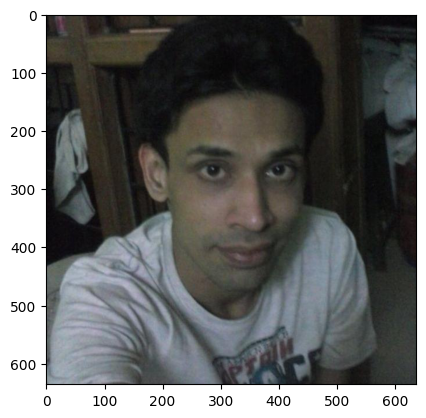

In [13]:
image = Image.open('/datasets/faces/final_files/000005.jpg')
plt.imshow(np.array(image))

#subject is 27 years old

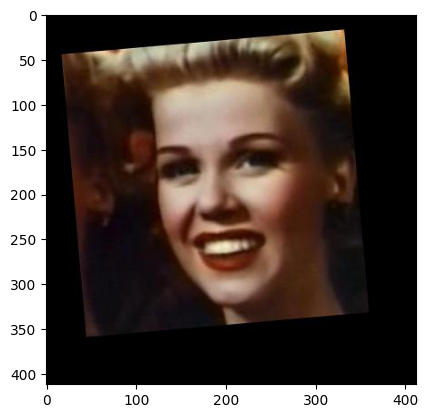

In [14]:
image = Image.open('/datasets/faces/final_files/000006.jpg')
plt.imshow(np.array(image))

#subject is 24 years old

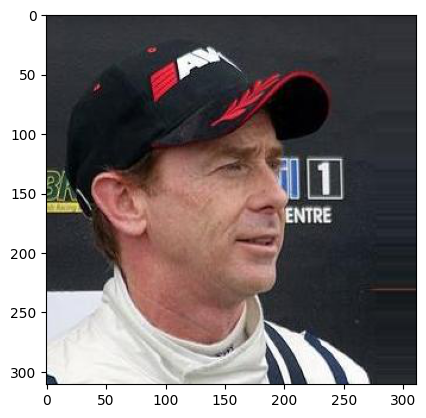

In [15]:
image = Image.open('/datasets/faces/final_files/000007.jpg')
plt.imshow(np.array(image))

#subject is 43 years old

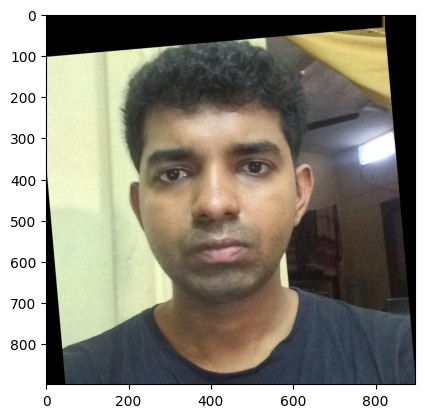

In [16]:
image = Image.open('/datasets/faces/final_files/000008.jpg')
plt.imshow(np.array(image))

#subject is 26 years old

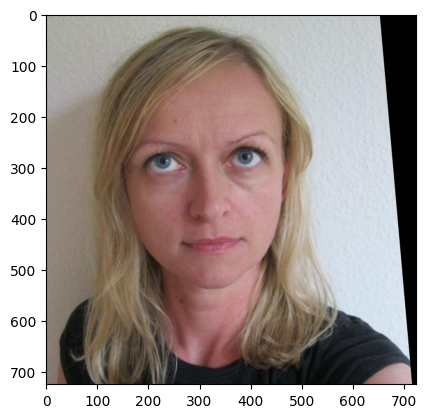

In [17]:
image = Image.open('/datasets/faces/final_files/000009.jpg')
plt.imshow(np.array(image))

#subject is 39 years old

### Findings

In looking through some samples of the images there are definetly some things that may impact how our model is trained. As previously stated the smaller sample size of older adults can impact accuracy, but also image quality may be a factor, male vs female may be a factor.  There are some people in this sample that are vastly different ages but have similar facial features. Some of the images have lower quality or look older which may be a factor and then there are some women who wear make up and others that don't that can make them look younger or older. Additionally, some images are of people's faces straight on while others are more side profiles.  All these things can possibly impact the accuracy of our model. 

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

    
Good conclusion.

</div>

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [18]:
#this was in the precode so I left it, but I imported all of these in the beginning during my initialization
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [19]:
def load_train(path):
    
    """
    It loads the train part of dataset from path
    """
    
    train_datagen = ImageDataGenerator(validation_split=0.25, 
                                       rescale=1.0/255
                                ) 

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + "labels.csv"),
        directory=path +'final_files/', 
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16, # 32
        class_mode='raw',
        subset='training',
        seed=12345
    ) 
    
    return train_gen_flow

In [20]:
def load_test(path):
    
    """
    It loads the validation/test part of dataset from path
    """
    
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1.0/255
    )

    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + "labels.csv"),
        directory=path +'final_files/', 
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16, # 32
        class_mode='raw',
        subset='validation',
        seed=12345
    )

    return test_gen_flow

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, augmentation should help us here. It's great that you specify the `subset` parameter values. If we don't do this, the model will be trained and evaluated on the same data. 
    

The `class_mode` value is also correct. 

</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
I recommend using some variable for `seed`. 

</div>

In [21]:
def create_model(input_shape):
    
    """
    It defines the model
    """
    
    backbone = ResNet50(weights='imagenet', 
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])


    return model

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


Correct! 
    
    
- `Dense(1, activation='relu')` is appropriate, since you are predicting a single value. Using 1 neuron makes sense here.

    
- Adam optimizer with learning rate 0.0005 is a solid and commonly used choice, well done. 


- The use of MSE loss and MAE as metric is also correct. MSE encourages precision, and MAE helps us interpret error scale in the same units as the target.

</div>

In [22]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Trains the model given the parameters
    """
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
        
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

### Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [23]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

Place the output from the GPU platform as an Markdown cell here.

Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921
Epoch 2/20
356/356 - 35s - loss: 76.8372 - mae: 6.6707 - val_loss: 127.6357 - val_mae: 8.6035
Epoch 3/20
356/356 - 35s - loss: 69.9428 - mae: 6.3992 - val_loss: 91.1531 - val_mae: 7.4454
Epoch 4/20
356/356 - 35s - loss: 64.4249 - mae: 6.1407 - val_loss: 124.0287 - val_mae: 8.3481
Epoch 5/20
356/356 - 35s - loss: 52.8486 - mae: 5.5913 - val_loss: 109.1004 - val_mae: 8.2192
Epoch 6/20
356/356 - 35s - loss: 46.3094 - mae: 5.2223 - val_loss: 85.1038 - val_mae: 7.0332
Epoch 7/20
356/356 - 35s - loss: 38.2617 - mae: 4.7951 - val_loss: 92.0900 - val_mae: 7.3359
Epoch 8/20
356/356 - 35s - loss: 37.4804 - mae: 4.7402 - val_loss: 80.0016 - val_mae: 6.7239
Epoch 9/20
356/356 - 35s - loss: 33.5237 - mae: 4.4271 - val_loss: 83.2579 - val_mae: 6.8529
Epoch 10/20
356/356 - 35s - loss: 28.5170 - mae: 4.1411 - val_loss: 83.5056 - val_mae: 6.9629
Epoch 11/20
356/356 - 35s - loss: 27.0142 - mae: 3.9700 - val_loss: 92.1290 - val_mae: 7.1866
Epoch 12/20
356/356 - 35s - loss: 27.4564 - mae: 4.0428 - val_loss: 185.6307 - val_mae: 11.4591
Epoch 13/20
356/356 - 35s - loss: 23.7961 - mae: 3.7407 - val_loss: 92.3429 - val_mae: 7.2467
Epoch 14/20
356/356 - 35s - loss: 24.6167 - mae: 3.8116 - val_loss: 92.4542 - val_mae: 7.1401
Epoch 15/20
356/356 - 35s - loss: 22.2604 - mae: 3.6746 - val_loss: 82.5822 - val_mae: 6.7841
Epoch 16/20
356/356 - 35s - loss: 20.1899 - mae: 3.4430 - val_loss: 86.3830 - val_mae: 6.8304
Epoch 17/20
356/356 - 35s - loss: 17.3425 - mae: 3.2205 - val_loss: 78.4369 - val_mae: 6.6419
Epoch 18/20
356/356 - 35s - loss: 16.5249 - mae: 3.1295 - val_loss: 81.7731 - val_mae: 6.7226
Epoch 19/20
356/356 - 35s - loss: 16.6140 - mae: 3.1421 - val_loss: 80.9727 - val_mae: 6.9908
Epoch 20/20
356/356 - 35s - loss: 17.0187 - mae: 3.1785 - val_loss: 93.4115 - val_mae: 7.6512

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
   

Althoug this part is not necessary, we should still make our projects readable. You can use Markdown cells for your code and results: 

    ```python
    
    # code
    # or the output
    
    ```
    
Example:
    
</div>


```python

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50


...



Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921              
```

## Conclusions

In conclusion our model with the best MAE was Epoch 8 with an average error of 6.72 years when predicting age based on the image of the person.  While this may seem relatively small, in regards to our goal for GoodSeed it can put them at a high risk for underage people to be able to purchase alcohol if implemented as with an error of almost 7 years someone in the US as young as 14 could potentially be determined to be 21 and of legal drinking age. Therefore this model is likely not robust enough to use to predict age to buy alcohol legally.

As discussed during our EDA, we may be able to improve our overall results by increasing sample size of different ages. Making sure all photos used are of higher quality and the photos are not distorted in anyway. While all these things may help, it is not necessarily guaranteed to be accurate enough to utilize this in practice especially with the legal ramifications of potentially selling alcohol to minors.

A possible thing that this model could be used for is recommending other products or future sales to customers as they are checking out. If there is data on products that may be more popular in certain age groups like heart health supplements for older adults, or sweet treats for younger kids for example this model could be used because it does not have to be 100% accurate and there are likely correlation between shopping patterns of people within 7 years of each other.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Although the model shows small overfitting, it is still good. We can still think about further improvements. Sometimes it is possible to increase the dataset. What else can be done? Sometimes it may be helpful to try different data augmentation approaches. By the way, here's a good library [albumentations](https://github.com/albumentations-team/albumentations). Apart from this, we can consider introducing additional layers with some normalization methods. The optimization part is good. Adam is quite flexible, but you can still try other optimizers if you want. For example, AdamW sometimes shows better results. 



Regarding age verification, I would argue that we have some noticable limits here. It is much more reliable and much easier to just compare the id or passport photo to the customer's face. 

</div>

# Checklist

- [ ]  Notebook was opened
- [ ]  The code is error free
- [ ]  The cells with code have been arranged by order of execution
- [ ]  The exploratory data analysis has been performed
- [ ]  The results of the exploratory data analysis are presented in the final notebook
- [ ]  The model's MAE score is not higher than 8
- [ ]  The model training code has been copied to the final notebook
- [ ]  The model training output has been copied to the final notebook
- [ ]  The findings have been provided based on the results of the model training